# **A) Selección y Visualización de la Serie de Tiempo**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


df = yf.download(
    tickers='GOOGL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2017-03-05',        # Fecha de inicio
    end='2019-03-05',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )


df = df.reset_index()

df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]



df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date

df.set_index('Date', inplace=True)

df

[*********************100%***********************]  1 of 1 completed


,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume
Date,,,,,,
2017-03-06,42.342999,42.446999,42.058498,42.363499,42.161926,20958000
2017-03-07,42.362999,42.666500,42.276001,42.557499,42.355003,20774000
2017-03-08,42.655998,42.846500,42.562500,42.681999,42.478909,20576000
2017-03-09,42.684502,43.035500,42.633499,42.891998,42.687908,26954000
2017-03-10,43.134998,43.211498,42.880501,43.070499,42.865562,26732000
...,...,...,...,...,...,...
2019-02-26,55.718498,56.321999,55.334999,56.100498,55.833561,35026000
2019-02-27,55.700500,56.286499,55.428001,56.144501,55.877357,22092000
2019-02-28,55.950001,56.699501,55.920502,56.327499,56.059483,27422000


In [2]:
pip install alpha_vantage

In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'KSZKZM73673SN0XD'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AAPL
ticker = 'GOOGL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df



,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Volume
date,,,,,
2025-04-01,153.620,158.1000,153.620,157.07,30672899.0
2025-03-31,153.110,155.5400,150.662,154.64,54603464.0
2025-03-28,160.490,161.8200,153.630,154.33,48669335.0
2025-03-27,164.630,165.4200,162.000,162.24,24508273.0
2025-03-26,169.000,169.6100,164.840,165.06,28939326.0
...,...,...,...,...,...
2024-01-08,136.290,139.0100,136.260,138.84,21403982.0
2024-01-05,136.745,137.1558,135.150,135.73,21661914.0
2024-01-04,138.420,139.1600,136.350,136.39,27137735.0


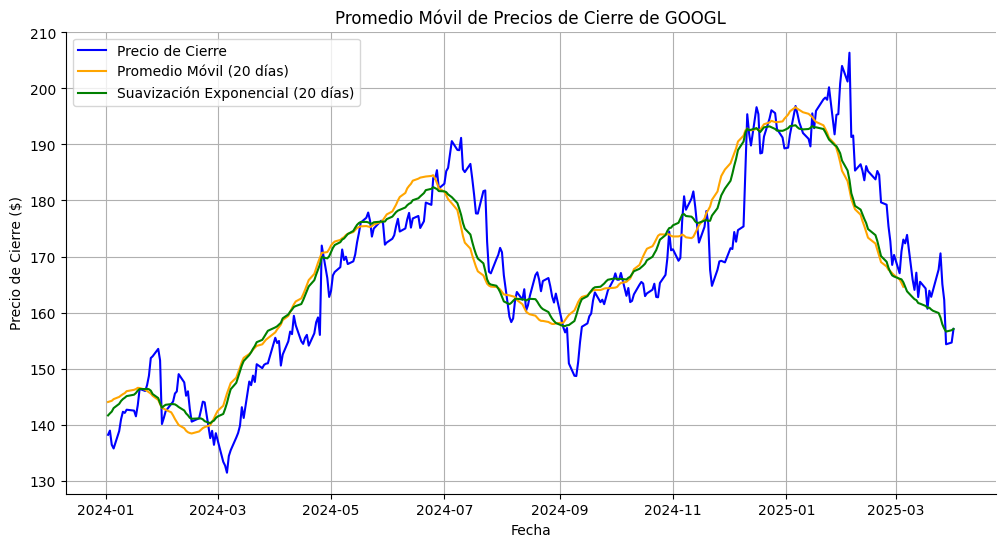

In [4]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['GOOGL_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['GOOGL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['GOOGL_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de GOOGL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Los cruces de medias móviles nos señalan los posibles cambios que tienen de tendencia: si el precio pasa por encima de la mitad, es señal  que sube y si pasa por debajo, es señal que puede bajar.

(La foto a marque yo, como dijo en clase)


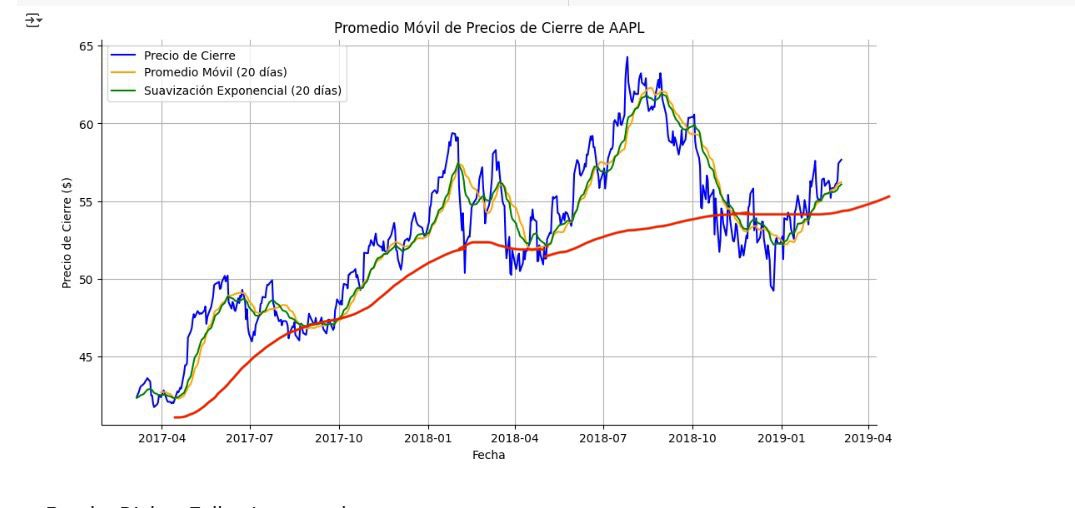



# **B) Prueba de Estacionariedad**



In [5]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['GOOGL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -1.2562960381434176
p-value: 0.64892238101491
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Se acepta la hipótesis nula ya que es mayor a 0.05, lo cual significa que la serie no es estacionaria.


# **C) Regresión Polinomial y Estacionariedad de los Residuales**

1. Regresión Polinomial
2. Gráfico de residuales

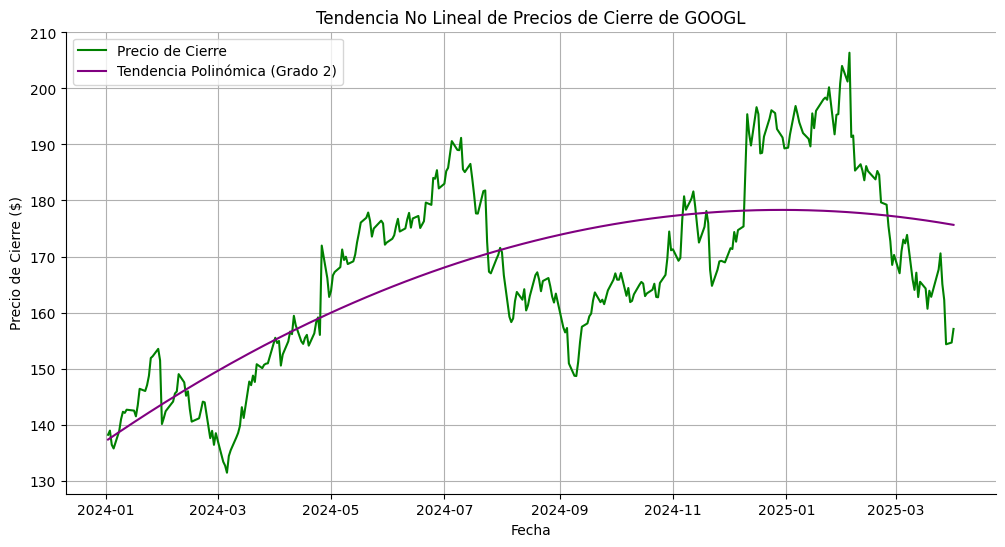

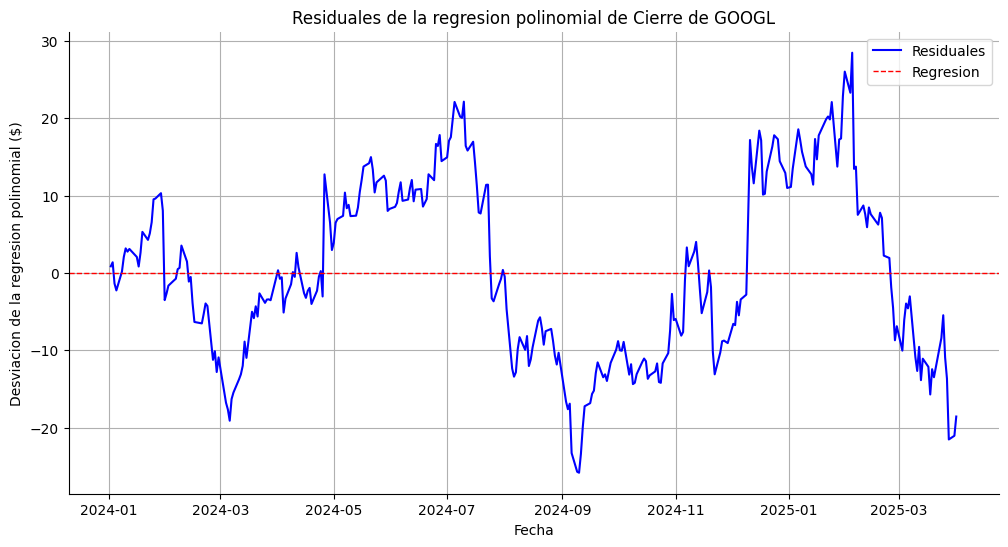

In [6]:

from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['GOOGL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de GOOGL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de GOOGL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [7]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['GOOGL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.006390  1888.063584        156.500000
1    0.015974   783.537292         62.600000
2    0.009585   703.630865        104.333333
3    0.012780   652.051727         78.250000
4    0.038339   396.282157         26.083333


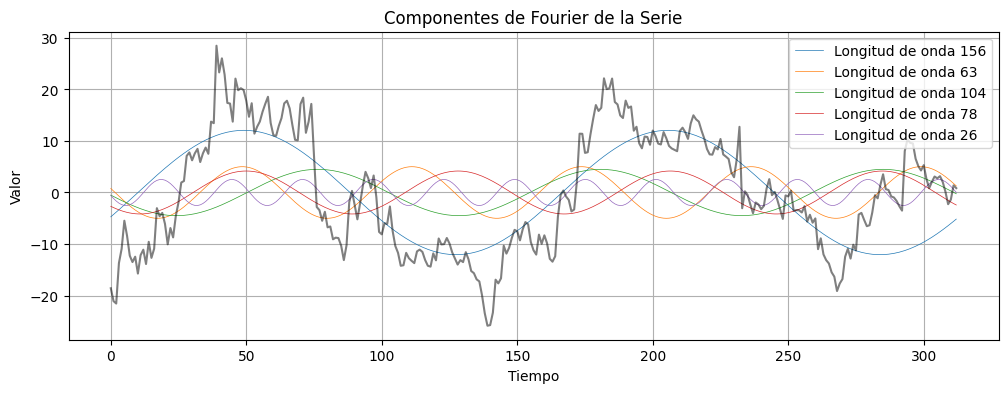

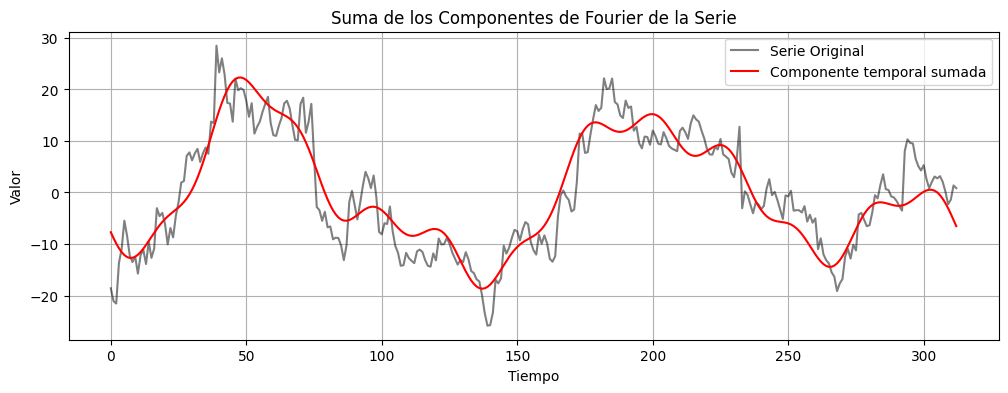

In [8]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


# 63/252 = 0.25


ME DIO UNA ESTACIONALIDAD SEMESTRAL PERFECTA

3.
Prueba de Estacionariedad en los Residuales

In [9]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['GOOGL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.2562960381434176
p-value: 0.64892238101491
La tendencia no es estacionaria (aceptamos la hipótesis nula).


4. Inferir la Estacionalidad y Aplicar una Prueba de Hipótesis:

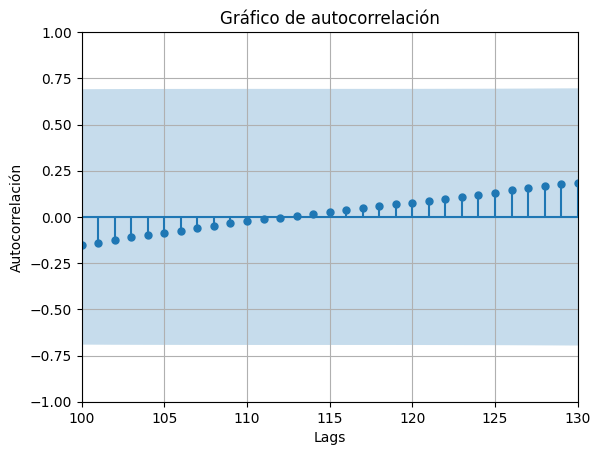

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['GOOGL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

El análisis del gráfico de autocorrelación  no muestra una evidencia buena de estacionalidad en los datos del precio de cierre, por eso voy a descomponer la serie para poder ver bien los resultados

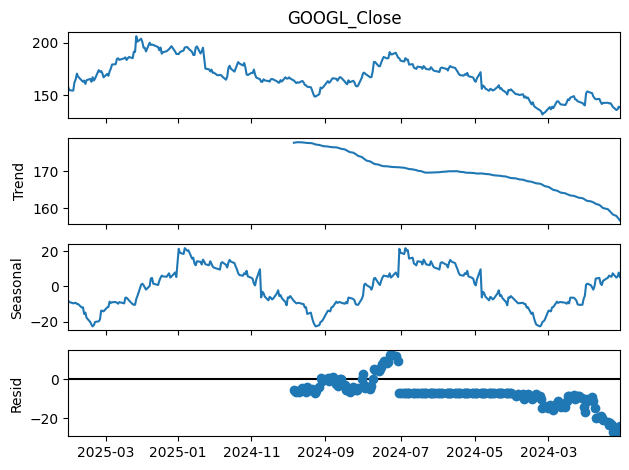

In [11]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['GOOGL_Close'],
    model='additive',
    period=126,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

# **D) Informe y Conclusiones**







**Estacionalidad**

No hay estacionalidad porque la prueba ADF nos da el resultado de =0.649, lo que nos dice que la serie no es estacionaria.

La  Estacionalidad  no fue muy clara, no se detectaron patrones significativos en el período de los 126 días.


**Tendencia**

Se identificó una tendencia no lineal, que se mostro en los promedios móviles.
En la descomposicion se muestran cambios graduales y  algunas variaciones pero son extremas.

**Residuales**

En la descomposición, los residuales tienen un comportamiento de ruido  de forma aleatoria, con pequeñas subidas y bajadas alrededor del valor cero. No se observan patrones extraños
, lo que indica que la descomposición funcionó bien y logró separar correctamente la tendencia y la estacionalidad.

Como conclusión puedo decir que el comportamiento de las acciones de GOOGL está compuesto por una tendencia moderada, una estacionalidad buena y un componente de ruido controlado.  La tendencia muestra cambios estables a lo largo del año, sin variaciones extremas, lo que indica que tiene una evolución estable, lo que quiere decir que los precios de GOOGL son estables